# Playing around with python and pytorch for my bachelor thesis


Let's do some pre experiments. We now have a look at the distibution of the weights during a single magnitude based pruning. I pruned away 90% of the weights in the pruning procedure. The network had the same accuracy as the previous one after 10 epochs of retraing

In [8]:
import pandas as pd
import seaborn as sns

Since the seaborn package currently uses some functions that will be changed in the future we get an error if we try to plot a distribution, so we don't show the future warnings any more since they don't affect the outcome of the plotting.

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Magnitude based pruning

Here we will compare the distribution of the weights before the pruning, after the pruning and after the retraining. In the beggining you can see that the weights are nearly gaussian distributed. After the single pruning of the top 90% of the weights we all the middle weights are eliminated as expected. Even after the retraining which reaches as satisfying performance as the previous network the distribution has dramatically changed. In contrast to this the weights are distributed nearly normal before the training process in the interval [-0.5, 0.5].

In [9]:
sns.set()
sns.set_context("paper")

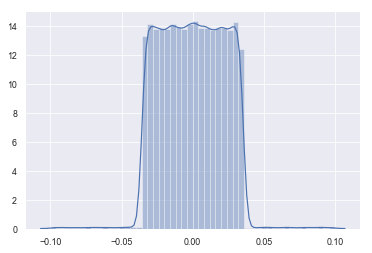

In [20]:
sns.distplot(pd.read_pickle('./results/magnitude_weight_distribution/untrained.pkl'))

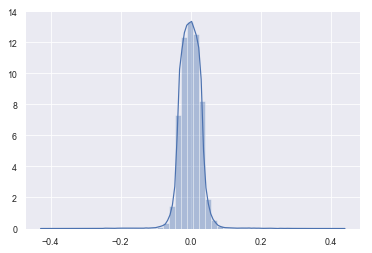

In [16]:
sns.distplot(pd.read_pickle('./results/magnitude_weight_distribution/unpruned.pkl'))

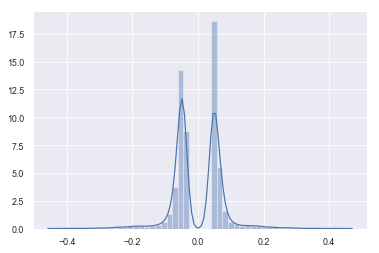

In [17]:
sns.distplot(pd.read_pickle('./results/magnitude_weight_distribution/pruned.pkl'))

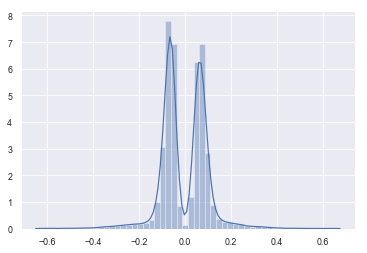

In [18]:
sns.distplot(pd.read_pickle('./results/magnitude_weight_distribution/retrained.pkl'))

## Random pruning

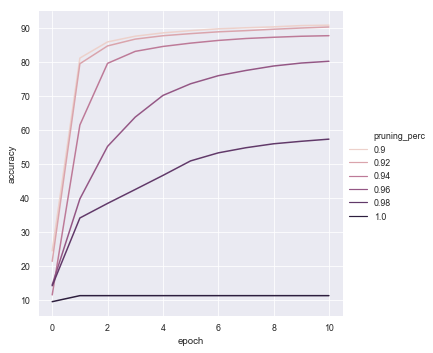

In [19]:
s = pd.read_pickle('./results/random_pruning_results/random_single_pruning.pkl')
plot = sns.relplot(x='epoch', y='accuracy', hue='pruning_perc', legend='full', kind="line", data=s, linewidth=1.5)

## Pruning Algorithms

Now we can implement the pruning algorithms. In this sheet we will implement 6 different strategies. Two of them are based on the general network and the other 4 are top down strategies, meaning their caluculations are based on the network outout. The strategies are:
- Random Pruning
- Magnitude Based Pruning
- OBD
- OBS
- Net-Trim
- Layerwise OBS

There are several ways to prune in a network the two main approaches are ``iterative pruning`` and ``single pruning``. 

In iterative pruning in each step either the ``top-k elements``, the ``top-p percentage`` or up to a specific threshold of the sum (``bucket``) is pruned. After the pruning procedure there is a retraining of two epochs with the stocastic gradient descent with a batch size of 64 images. 

In single pruning only one time is pruned therefore with a longer retraining phase. Normaly we use here 10 epochs for retraining but stop after one pruning procedure. For single pruning we can prune in a ``top-k elements`` way or up to a ``bucket`` as well. Again we retrain with stacastic gradient descent and a batch size of 64 images.